In [22]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt


In [23]:
# 파일 경로
file_path = '군구별_연령대_음주운전_합계.csv'

# 데이터 로드
data = pd.read_csv(file_path, encoding='utf-8-sig', index_col=0)

In [24]:
# 1. 데이터 준비: 군구별 합계를 특징으로 사용
features = data.copy()


In [25]:
# 2. 데이터 표준화
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)


In [26]:

# 3. 엘보우 방법으로 최적의 클러스터 개수 결정
inertia = []
for k in range(1, 11):  # 클러스터 개수를 1~10까지 시도
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(features_scaled)
    inertia.append(kmeans.inertia_)


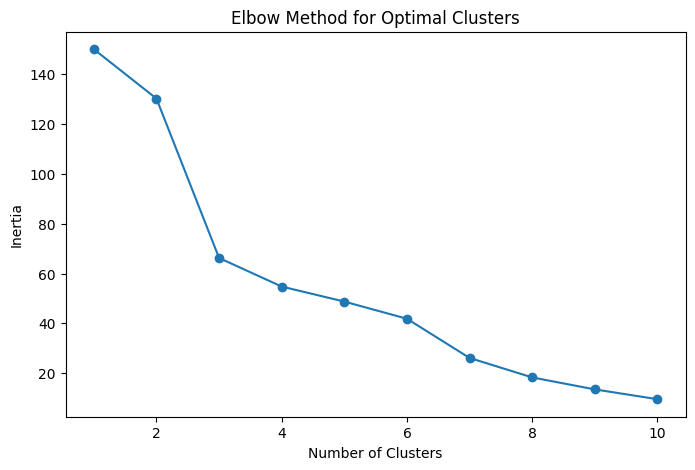

In [27]:

# 엘보우 방법 시각화
plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


In [28]:

# 4. K-Means 클러스터링
optimal_k = 3  # 엘보우 방법 결과로 얻은 최적 클러스터 개수
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
data['Cluster'] = kmeans.fit_predict(features_scaled)


In [29]:

# 5. 군집별 데이터 확인
print(data.groupby('Cluster').mean())


             10.0대  120.0대       20.0대       30.0대       40.0대       50.0대  \
Cluster                                                                      
0        11.000000     1.0  208.000000  327.000000  297.500000  192.500000   
1         6.333333     0.0  135.666667  148.333333  137.000000  117.000000   
2        21.857143     0.0  292.285714  342.857143  332.428571  262.142857   

              60.0대      70.0대     80.0대      nan대  
Cluster                                             
0         98.500000  16.500000  0.500000  0.500000  
1         54.166667   8.500000  0.666667  0.000000  
2        118.857143  18.571429  1.428571  0.142857  


In [30]:
# 군집별로 군구 확인
for cluster in range(optimal_k):  # optimal_k는 군집 수
    print(f"Cluster {cluster}에 포함된 군구:")
    print(data[data['Cluster'] == cluster].index.tolist())
    print("\n")


Cluster 0에 포함된 군구:
['강서구', '동래구']


Cluster 1에 포함된 군구:
['동구', '북구', '서구', '연제구', '영도구', '중구']


Cluster 2에 포함된 군구:
['금정구', '기장군', '남구', '부산진구', '사상구', '사하구', '해운대구']




## 군집 분석 결과
출력된 평균 데이터 설명:
각 열(10.0CH, 20.0CH, ...): 특정 연령대 또는 시간대에 해당하는 음주운전 건수의 평균.

행(Cluster 0, Cluster 1, Cluster 2): 각 군집에 속한 군구들의 평균값.
각 군집 해석:

- Cluster 0:

20.0CH~50.0CH 구간에서 음주운전 건수가 다른 클러스터에 비해 높음.
특히 30.0CH에서 평균값이 327로, 다른 클러스터보다 월등히 높음.
60.0CH 이후의 데이터는 상대적으로 낮음.

해당 군구들이 주로 30대~50대 연령층에서 음주운전 발생률이 높은 지역일 가능성이 있음.

- Cluster 1:

전반적으로 음주운전 건수가 가장 낮은 클러스터.
모든 연령대와 시간대에서 평균값이 매우 낮음.

음주운전 문제가 심각하지 않은 지역.
안전한 지역으로 볼 수 있으며, 단속의 필요성이 낮을 수 있음.

- Cluster 2:

20.0CH~60.0CH 구간에서 음주운전 건수가 매우 높음.
특히 30.0CH(342.86)와 40.0CH(332.43)에서 가장 높은 값을 기록.
모든 연령대에 걸쳐 음주운전 문제가 심각함.

전반적으로 음주운전 문제가 심각한 지역으로, 단속 및 예방 캠페인 집중이 필요.

## 해석 요약:

Cluster 0: 중간 수준의 음주운전 발생률. 주로 30대~50대에서 음주운전 문제가 발생.

Cluster 1: 음주운전 발생률이 가장 낮음. 비교적 안전한 지역.

Cluster 2: 음주운전 발생률이 매우 높음. 30대~40대 연령층에서 가장 심각.

## 활용 방안:

- Cluster 2 지역:

음주운전 단속 강화 및 예방 캠페인 필요.

특히 30대~40대 연령층을 대상으로 한 홍보와 단속 집중.

- Cluster 0 지역:

중간 수준의 단속 및 예방 필요.

특정 연령층(30~50대) 중심의 정책 설계.

- Cluster 1 지역:

단속 필요성이 낮지만, 지속적인 예방 정책 유지.


In [31]:
# 6. 결과 저장
output_path = '연령대별_부산군구_군집분석결과.csv'
data.to_csv(output_path, encoding='utf-8-sig')